<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Bayezian_HyperTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
import xgboost

In [2]:
df = pd.read_csv('bank-full-dataset.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [3]:
df = df.iloc[:, 1:]
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [4]:
df.y.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

In [5]:
data, target = df.drop('y', axis=1), df.y
data.shape, target.shape

((45211, 16), (45211,))

In [6]:
num_features = data.select_dtypes(include='number').columns.tolist()
cat_features = data.select_dtypes(include='object').columns.tolist()

In [7]:
from scipy.stats import zscore

dt= data[num_features].apply(zscore)
data[num_features] = pd.DataFrame(dt, columns=num_features)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,management,married,tertiary,no,0.256419,yes,no,NaN,-1.298476,may,0.011016,-0.569351,-0.411453,-0.25194,NaN
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,NaN,-1.298476,may,-0.416127,-0.569351,-0.411453,-0.25194,NaN
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,NaN,-1.298476,may,-0.707361,-0.569351,-0.411453,-0.25194,NaN
3,0.571051,blue-collar,married,NaN,no,0.047205,yes,no,NaN,-1.298476,may,-0.645231,-0.569351,-0.411453,-0.25194,NaN
4,-0.747384,NaN,single,NaN,no,-0.447091,no,no,NaN,-1.298476,may,-0.233620,-0.569351,-0.411453,-0.25194,NaN


In [8]:
!pip install category_encoders --quiet

In [9]:
import category_encoders as ce

# create instance of binary encoding
ce_binary = ce.BinaryEncoder(data[cat_features])

# fit and transform to get encoded cat
bin = ce_binary.fit_transform(data[cat_features])
data = pd.concat([data.drop(columns=cat_features), bin], axis=1)
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,balance,day,duration,campaign,pdays,previous,job_0,job_1,job_2,...,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,poutcome_0,poutcome_1,poutcome_2
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,1,0,1,0,0,0,1,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,1,0,1,0,0,0,1,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,1,0,...,1,0,1,0,0,0,1,0,0,1


In [10]:
df_full_processed = pd.concat([data, df.y], axis=1)
df_full_processed.head()

,age,balance,day,duration,campaign,pdays,previous,job_0,job_1,job_2,...,contact_0,contact_1,month_0,month_1,month_2,month_3,poutcome_0,poutcome_1,poutcome_2,y
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,0,1,0,0,0,1,0,0,1,no
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,1,...,0,1,0,0,0,1,0,0,1,no
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,0,1,0,0,0,1,0,0,1,no
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,0,1,0,0,0,1,0,0,1,no
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,1,0,...,0,1,0,0,0,1,0,0,1,no


In [11]:
df_full_processed.to_csv('df_full_processed.csv')

In [12]:
data.isna().any().any()

False

In [13]:
# X, X_test, y, y_test = model_selection.train_test_split(
#     data, target,
#     test_size=.25,
#     random_state=42,
#     stratify=target,
# )

# X_train, X_dev, y_train, y_dev = model_selection.train_test_split(
#     X,y,
#     test_size=X_test.shape[0]/X.shape[0],
#     random_state=42,
#     stratify=y,
# )

# (
#     X_train.shape, y_train.shape,
#     X_dev.shape, y_dev.shape,
#     X_test.shape, y_test.shape
#  )

In [18]:
def optimize(params, param_names, x, y):
  params = dict(zip(param_names, params))
  model = ensemble.RandomForestClassifier(**params)
  kf = model_selection.StratifiedKFold(n_splits=5)
  accuracies = []

  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain = x[train_idx]
    ytrain = y[train_idx]
    xtest = x[test_idx]
    ytest = y[test_idx]
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    fold_accuracy = metrics.accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  
  return -1 * np.mean(accuracies)

In [15]:
!pip install scikit-optimize --quiet

In [19]:
from functools import partial

from skopt import gp_minimize
from skopt import space

param_space = [
              space.Integer(3, 15, name="max_depth"),
              space.Integer(100, 1500, name="n_estimators"),
              space.Categorical(["gini", "entropy"], name="criterion"),
              space.Real(0.01, 1, prior="uniform", name="max_features"),
              space.Integer(1, 10, name="min_samples_leaf")
]

param_names = [
 "max_depth",
 "n_estimators",
 "criterion",
 "max_features",
 "min_samples_leaf",
 ]

optimization_function = partial(optimize,
                                param_names=param_names,
                                x=data.values,
                                y=target.values
)

result = gp_minimize(
    optimization_function,
    dimensions=param_space,
    n_calls=15,
    n_random_starts=10,
    verbose=10
)

# create best params dict and print it
best_params = dict(zip(param_names,result.x))
print(best_params)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 143.4125
Function value obtained: -0.7866
Current minimum: -0.7866
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 333.2718
Function value obtained: -0.6830
Current minimum: -0.7866
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 225.4192
Function value obtained: -0.7764
Current minimum: -0.7866
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 383.1947
Function value obtained: -0.7716
Current minimum: -0.7866
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 704.8337
Function value obtained: -0.7020
Current minimum: -0.7866
Iteration No: 6

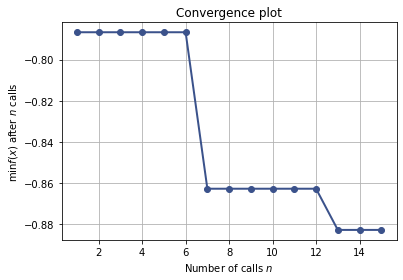

In [20]:
from skopt.plots import plot_convergence
plot_convergence(result)

In [21]:
!pip install optuna --quiet

     |████████████████████████████████| 308 kB 32.2 MB/s 
     |████████████████████████████████| 81 kB 7.0 MB/s 
     |████████████████████████████████| 210 kB 47.7 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 150 kB 53.8 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 113 kB 58.3 MB/s 


In [22]:
def optimize(trial, x, y):
  criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
  n_estimators = trial.suggest_int('n_estimators', 100, 1500)
  max_depth = trial.suggest_int('max_depth', 3, 15)
  max_features = trial.suggest_uniform('max_features', .01, 1.)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
  # initialize model with current parameters
  model = ensemble.RandomForestClassifier(
      criterion=criterion,
      n_estimators=n_estimators,
      max_depth=max_depth,
      max_features=max_features,
      min_samples_leaf= min_samples_leaf,
  )
  kf = model_selection.StratifiedKFold(n_splits=5)
  accuracies = []

  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain = x[train_idx]
    ytrain = y[train_idx]
    xtest = x[test_idx]
    ytest = y[test_idx]
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    fold_accuracy = metrics.accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  
  return -1 * np.mean(accuracies)

In [23]:
import optuna

optimization_function = partial(optimize, x=data.values, y=target.values)
study = optuna.create_study(direction='minimize')
study.optimize(optimization_function, n_trials=15)

[I 2022-04-10 13:33:07,068] A new study created in memory with name: no-name-0f80f64e-e10b-42f9-85f4-45fb8168d180
[I 2022-04-10 13:35:32,055] Trial 0 finished with value: -0.7570917274180919 and parameters: {'criterion': 'gini', 'n_estimators': 402, 'max_depth': 5, 'max_features': 0.8896242192825669, 'min_samples_leaf': 5}. Best is trial 0 with value: -0.7570917274180919.
[I 2022-04-10 13:40:05,645] Trial 1 finished with value: -0.7014845608620203 and parameters: {'criterion': 'entropy', 'n_estimators': 1247, 'max_depth': 13, 'max_features': 0.21985942745035486, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.7570917274180919.
[I 2022-04-10 13:42:05,387] Trial 2 finished with value: -0.8625993584731682 and parameters: {'criterion': 'gini', 'n_estimators': 1219, 'max_depth': 5, 'max_features': 0.1882059998540868, 'min_samples_leaf': 1}. Best is trial 2 with value: -0.8625993584731682.
[I 2022-04-10 13:48:46,676] Trial 3 finished with value: -0.7142472215436665 and parameters: {'c

In [ ]:
def optimize(trial, x, y):
  criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
  n_estimators = trial.suggest_int('n_estimators', 100, 1500)
  max_depth = trial.suggest_int('max_depth', 3, 15)
  max_features = trial.suggest_uniform('max_features', .01, 1.)
  # min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
  # initialize model with current parameters
  model = ensemble.RandomForestClassifier(
      criterion=criterion,
      n_estimators=n_estimators,
      max_depth=max_depth,
      max_features=max_features,
      # min_samples_leaf= min_samples_leaf,
  )
  kf = model_selection.StratifiedKFold(n_splits=5)
  accuracies = []

  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain = x[train_idx]
    ytrain = y[train_idx]
    xtest = x[test_idx]
    ytest = y[test_idx]
    model.fit(xtrain, ytrain)
    preds = model.predict(xtest)
    fold_accuracy = metrics.accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  
  return -1 * np.mean(accuracies)

In [24]:
optimization_function = partial(optimize, x=data.values, y=target.values)
study = optuna.create_study(direction='minimize')
study.optimize(optimization_function, n_trials=15)

[I 2022-04-10 14:16:44,004] A new study created in memory with name: no-name-f6007346-1476-41db-9b1c-f888c577d740
[I 2022-04-10 14:17:16,850] Trial 0 finished with value: -0.7891200397383751 and parameters: {'criterion': 'gini', 'n_estimators': 306, 'max_depth': 15, 'max_features': 0.051951667366173876, 'min_samples_leaf': 1}. Best is trial 0 with value: -0.7891200397383751.
[I 2022-04-10 14:17:55,212] Trial 1 finished with value: -0.7040946004421402 and parameters: {'criterion': 'entropy', 'n_estimators': 146, 'max_depth': 13, 'max_features': 0.28873758850268244, 'min_samples_leaf': 7}. Best is trial 0 with value: -0.7891200397383751.
[I 2022-04-10 14:22:46,602] Trial 2 finished with value: -0.7447714442948892 and parameters: {'criterion': 'gini', 'n_estimators': 759, 'max_depth': 6, 'max_features': 0.7475495432191229, 'min_samples_leaf': 6}. Best is trial 0 with value: -0.7891200397383751.
[I 2022-04-10 14:24:21,401] Trial 3 finished with value: -0.8631302144784767 and parameters: {'

In [25]:
trial = study.best_trial
print(f'Accuracy: {trial.value}')
print(f'Best params: {trial.params}')

Accuracy: -0.8846298826934735
Best params: {'criterion': 'entropy', 'n_estimators': 982, 'max_depth': 7, 'max_features': 0.013295327854520316, 'min_samples_leaf': 10}


In [26]:
optuna.visualization.plot_optimization_history(study)

In [27]:
optuna.visualization.plot_slice(study)